### Student Details

Student Name: Hoang Tu Bui

Student ID: 24005665


# Task 2: scikit learn

In [2]:
# import dependencies
import numpy as np


1.	Read the iris dataset using Pandas (ref Option 2 above)
2.	Extract the Iris-setosa and Iris-verginica samples only
3.	Extract the petal length and petal width. These shall be our features.

In [6]:
import pandas as pd
df = pd.read_csv('iris_data.csv', header=0)
df


,sepal_length,sepa_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
# extract Iris-setosa and Iris-verginica
df2 = df[df[" class"].isin(["Iris-setosa", "Iris-virginica"])]

# extract petal length and petal width
df2 = df2[[" petal_length" , " petal_width", " class"]]

df2.head()

,petal_length,petal_width,class
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


4.	Plot the dataset as a scatter plot with the two Iris types shown as different colours

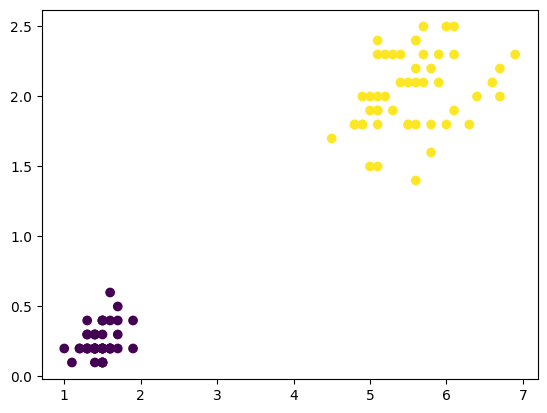

In [23]:
import matplotlib.pyplot as plt

plt.scatter(df2[" petal_length"], df2[" petal_width"], c=df2[" class"].apply(lambda x: 0 if x == "Iris-setosa" else 1))

5.	Use the perceptron in sklearn.linear_model to train on the Iris data previously used. Set verbose = 1; have a look at the epochs, it converges very quickly?

In [26]:
# So as not to confuse with our previously defined Perceptron class
from sklearn.linear_model import Perceptron as Perceptron 

percep = Perceptron(verbose=1)

percep.fit(df2[[" petal_length", " petal_width"]], df2[" class"])

-- Epoch 1
Norm: 1.52, NNZs: 2, Bias: -2.000000, T: 100, Avg. loss: 0.164200
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.52, NNZs: 2, Bias: -2.000000, T: 200, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.52, NNZs: 2, Bias: -2.000000, T: 300, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.52, NNZs: 2, Bias: -2.000000, T: 400, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.52, NNZs: 2, Bias: -2.000000, T: 500, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.52, NNZs: 2, Bias: -2.000000, T: 600, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.52, NNZs: 2, Bias: -2.000000, T: 700, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


Perceptron(verbose=1)

It converges very quickly

6.	Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary for the feature scaled case

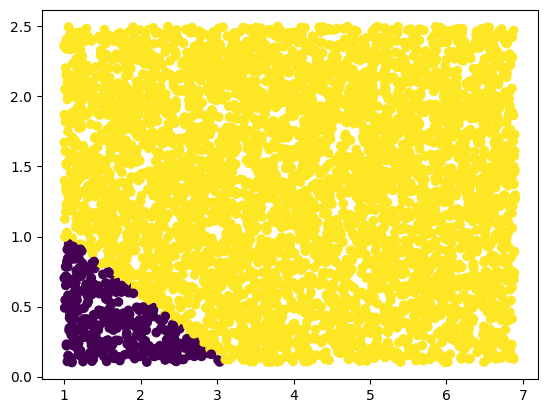

In [32]:
import random

X0Min = df2[" petal_length"].min()
X0Max = df2[" petal_length"].max()
X1Min = df2[" petal_width"].min()
X1Max = df2[" petal_width"].max()

# 5000 random points
df3 = pd.DataFrame(columns=[" petal_length", " petal_width"])
for i in range(5000):
    X0 = random.uniform(X0Min, X0Max)
    X1 = random.uniform(X1Min, X1Max)
    df3.loc[i] = [X0, X1]

y_pred5000 = percep.predict(df3)

plt.scatter(df3[" petal_length"], df3[" petal_width"], c=[1 if y == "Iris-virginica" else 0 for y in y_pred5000])